In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [3]:

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 

from sklearn import metrics

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist



In [4]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

from sklearn.metrics import silhouette_score


In [5]:
df = pd.read_excel("Credit Card Customer Data.xlsx")
df.head()

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3

In [ ]:
#1

In [6]:
df.shape

(660, 7)

In [7]:
#Shape, Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
#Removing 'Sl_No' column as it all the unique value and this column wont provide any insight to build a model
df.drop('Sl_No', axis=1, inplace=True)

In [9]:
df.describe().transpose()

count          mean           std      min       25%  \
Customer Key         660.0  55141.443939  25627.772200  11265.0  33825.25   
Avg_Credit_Limit     660.0  34574.242424  37625.487804   3000.0  10000.00   
Total_Credit_Cards   660.0      4.706061      2.167835      1.0      3.00   
Total_visits_bank    660.0      2.403030      1.631813      0.0      1.00   
Total_visits_online  660.0      2.606061      2.935724      0.0      1.00   
Total_calls_made     660.0      3.583333      2.865317      0.0      1.00   

                         50%      75%       max  
Customer Key         53874.5  77202.5   99843.0  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

In [10]:
df.nunique()

Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [ ]:
# There are 655 Unique Customer key. So, there must be 5 duplicate customer keys

In [11]:
#Check All duplicate Customer Keys. 
df[df.duplicated(subset=['Customer Key'],keep=False)]

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
4           47437            100000                   6                  0   
48          37252              6000                   4                  0   
104         97935             17000                   2                  1   
332         47437             17000                   7                  3   
391         96929             13000                   4                  5   
398         96929             67000                   6                  2   
411         50706             44000                   4                  5   
432         37252             59000                   6                  2   
541         50706             60000                   7                  5   
632         97935            187000                   7                  1   

     Total_visits_online  Total_calls_made  
4                     12                 3  
48                     2                 8  
104                    2                10  
332                    1                 0  
391                    0                 0  
398                    2                 2  
411                    0                 2  
432                    1                 2  
541                    2                 2  
632                    7                 0

In [ ]:
#5 duplicate customer keys should be removed

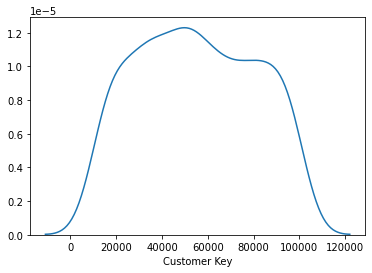

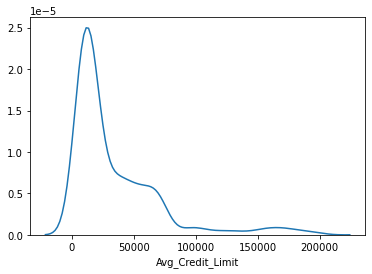

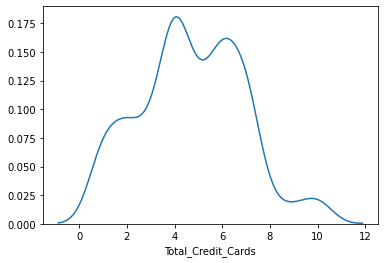

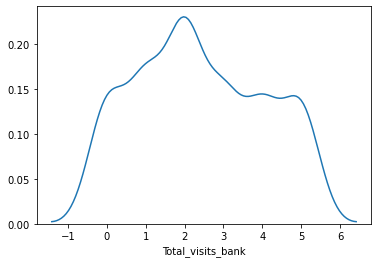

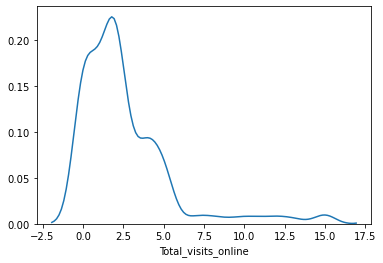

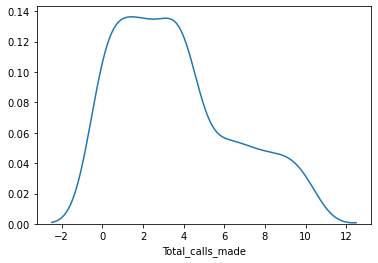

In [12]:
for i in df.columns:
    sns.distplot(df[i],hist=False,)
    plt.show()

In [ ]:
#Looks like there are 3 or 4 clusters. Need to use elbow method to confirm

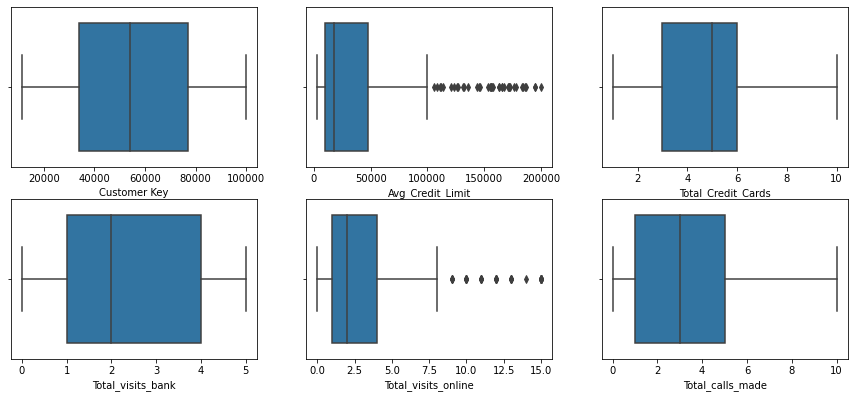

In [13]:
#Check for outliers using box plots
plt.figure(figsize=(15,10))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

In [ ]:
# There are several outliers for Average Credit limit and Total Visits Online

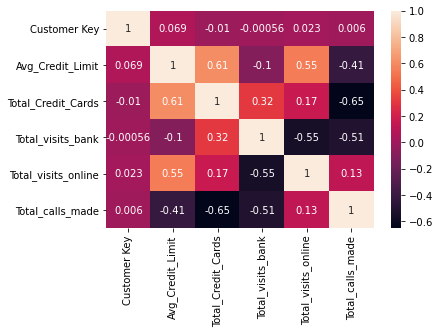

In [14]:
corr = df.corr()
sns.heatmap(corr, annot = True)

In [ ]:
#Total_calls_made is highly negatively correlated with Total_Credit_Cards
#Total_calls_made is negatively correlated with Avg_Credit_Limit and Total_visits_bank
#Total_visits_online is negatively correlated with Total_visits_bank

#Avg_Credit_Limit is positively correlated with Total_Credit_Cards and Total_visits_online


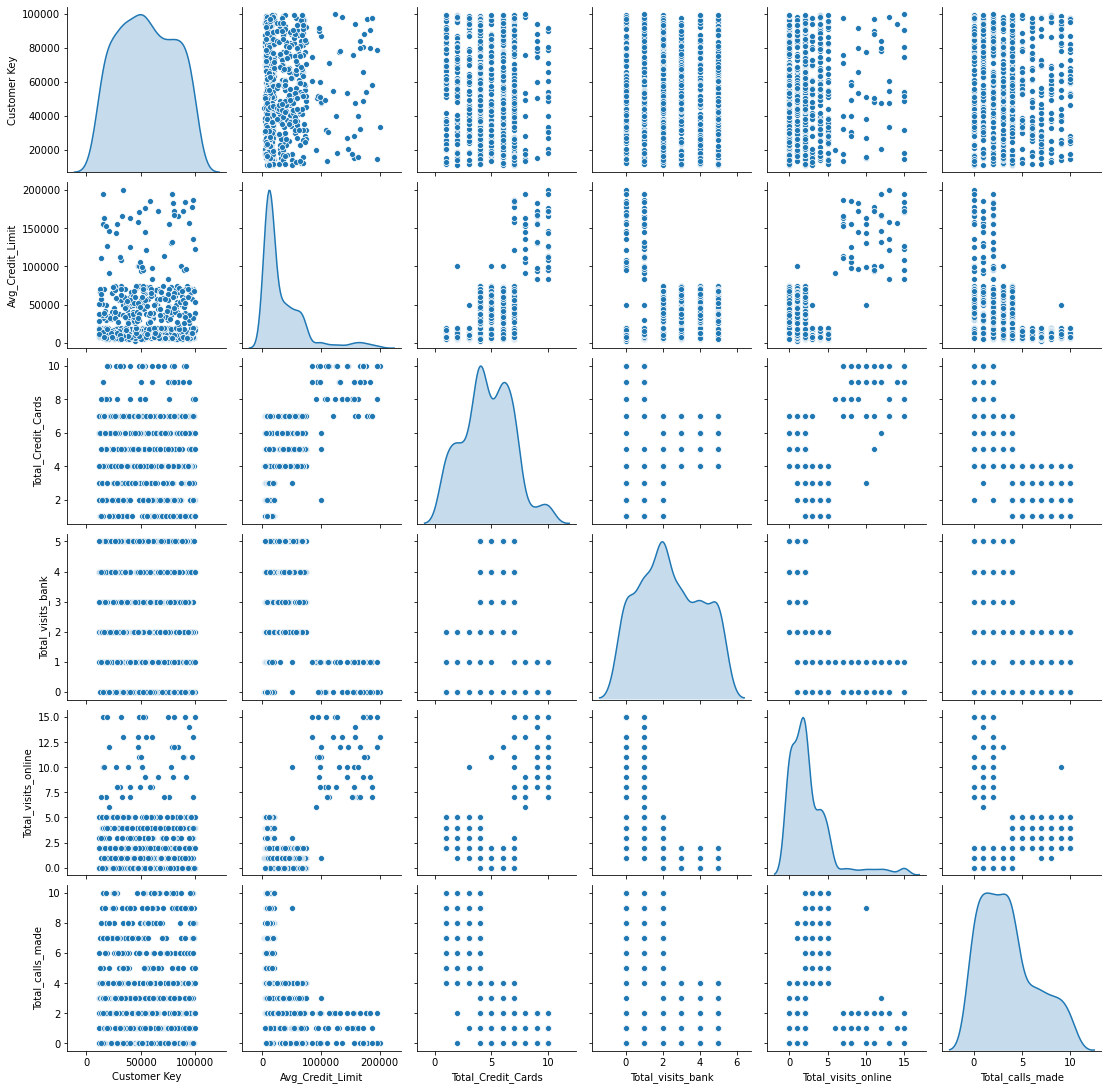

In [15]:
sns.pairplot(df,diag_kind='kde');

In [ ]:
#Looks like we might need 4 clusters based on Total_Credit_Cards. Let's try elbow method to confirm

In [16]:
import pandas_profiling 
#Getting the pandas profiling report and check for incorrect imputation
pandas_profiling.ProfileReport(df)

In [ ]:
#2

In [ ]:
#There are duplicate Customer key. We need to remove the duplicates 
#Based on the graphs we might need 3 or 4 clusters, we can confirm the same using the elbow method later.
#There are several outliers for Avg_Credit_Limit and Total_visits_online

In [17]:
df[df.duplicated(subset=['Customer Key'],keep='last')]

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
4           47437            100000                   6                  0   
48          37252              6000                   4                  0   
104         97935             17000                   2                  1   
391         96929             13000                   4                  5   
411         50706             44000                   4                  5   

     Total_visits_online  Total_calls_made  
4                     12                 3  
48                     2                 8  
104                    2                10  
391                    0                 0  
411                    0                 2

In [18]:
df.drop_duplicates(subset=['Customer Key'],keep='last', inplace=True)

In [19]:
#To confirm duplicates are dropped
df[df.duplicated(subset=['Customer Key'],keep='last')]

Empty DataFrame
Columns: [Customer Key, Avg_Credit_Limit, Total_Credit_Cards, Total_visits_bank, Total_visits_online, Total_calls_made]
Index: []

In [20]:
##Scale the data using zscore

df_z = df.apply(zscore)


In [ ]:
#3

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

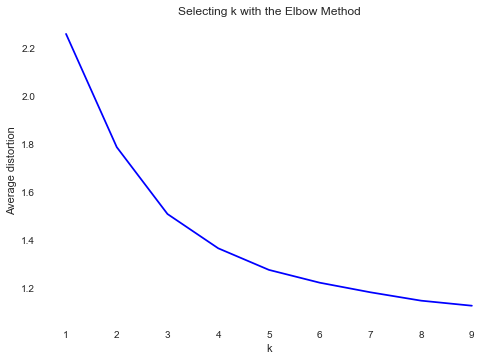

In [21]:
#### Finding optimal no. of clusters for scaled data
clusters=range(1,10)
meanDistortions1=[]

for k in clusters:
    model1=KMeans(n_clusters=k)
    model1.fit(df_z)
    prediction=model1.predict(df_z)
    meanDistortions1.append(sum(np.min(cdist(df_z, model1.cluster_centers_, 'euclidean'), axis=1)) / df_z
                           .shape[0])


plt.plot(clusters, meanDistortions1, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [ ]:
#Based on Elbow Method, 3 or 5 clusters.

In [22]:
#Let's try the value of 3 for K first
kmeans3 = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans3.fit(df_z)
k3_prediction=kmeans3.predict(df_z)


In [23]:
#Append the prediction 
df["K3_GROUP"] = k3_prediction
df_z["K3_GROUP"] = k3_prediction
df.head()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         87073            100000                   2                  1   
1         38414             50000                   3                  0   
2         17341             50000                   7                  1   
3         40496             30000                   5                  1   
5         58634             20000                   3                  0   

   Total_visits_online  Total_calls_made  K3_GROUP  
0                    1                 0         1  
1                   10                 9         0  
2                    3                 4         1  
3                    1                 4         1  
5                    1                 8         0

In [24]:
df_z.head(10)

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0       1.251195          1.739436           -1.249084          -0.864813   
1      -0.650482          0.410337           -0.788414          -1.480522   
2      -1.474051          0.410337            1.054266          -0.864813   
3      -0.569114         -0.121303            0.132926          -0.864813   
5       0.139750         -0.387123           -0.788414          -1.480522   
6      -0.261385          1.739436            0.132926          -1.480522   
7      -0.691049         -0.520033           -0.788414          -1.480522   
8       1.072084         -0.785853           -1.249084          -1.480522   
9      -0.402079         -0.839017           -0.327744          -1.480522   
10     -0.090559         -0.652943           -0.327744          -1.480522   

    Total_visits_online  Total_calls_made  K3_GROUP  
0             -0.548851         -1.252966         1  
1              2.535493          1.900849         0  
2              0.136559          0.148730         1  
3             -0.548851          0.148730         1  
5             -0.548851          1.550425         0  
6              2.878198         -0.552118         2  
7             -0.548851         -0.902542         0  
8             -0.206146         -0.552118         0  
9             -0.548851          1.200001         0  
10             0.821969          0.499153         0

In [25]:
#Analyze the distribution of the data among the three groups (K = 3)
df_groupedk3 = df_z.groupby(['K3_GROUP'])
df_groupedk3.mean()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
K3_GROUP                                                       
0             0.002750         -0.594990           -1.062326   
1            -0.010765         -0.020029            0.374058   
2             0.071903          2.852625            1.881592   

          Total_visits_bank  Total_visits_online  Total_calls_made  
K3_GROUP                                                            
0                 -0.903641             0.331067          1.147911  
1                  0.663236            -0.553313         -0.550293  
2                 -1.103557             2.836235         -0.888239

In [26]:
#Perform Value counts
df_groupedk3['K3_GROUP'].value_counts()  

K3_GROUP  K3_GROUP
0         0           222
1         1           384
2         2            49
Name: K3_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F76357BA08>,
      dtype=object)

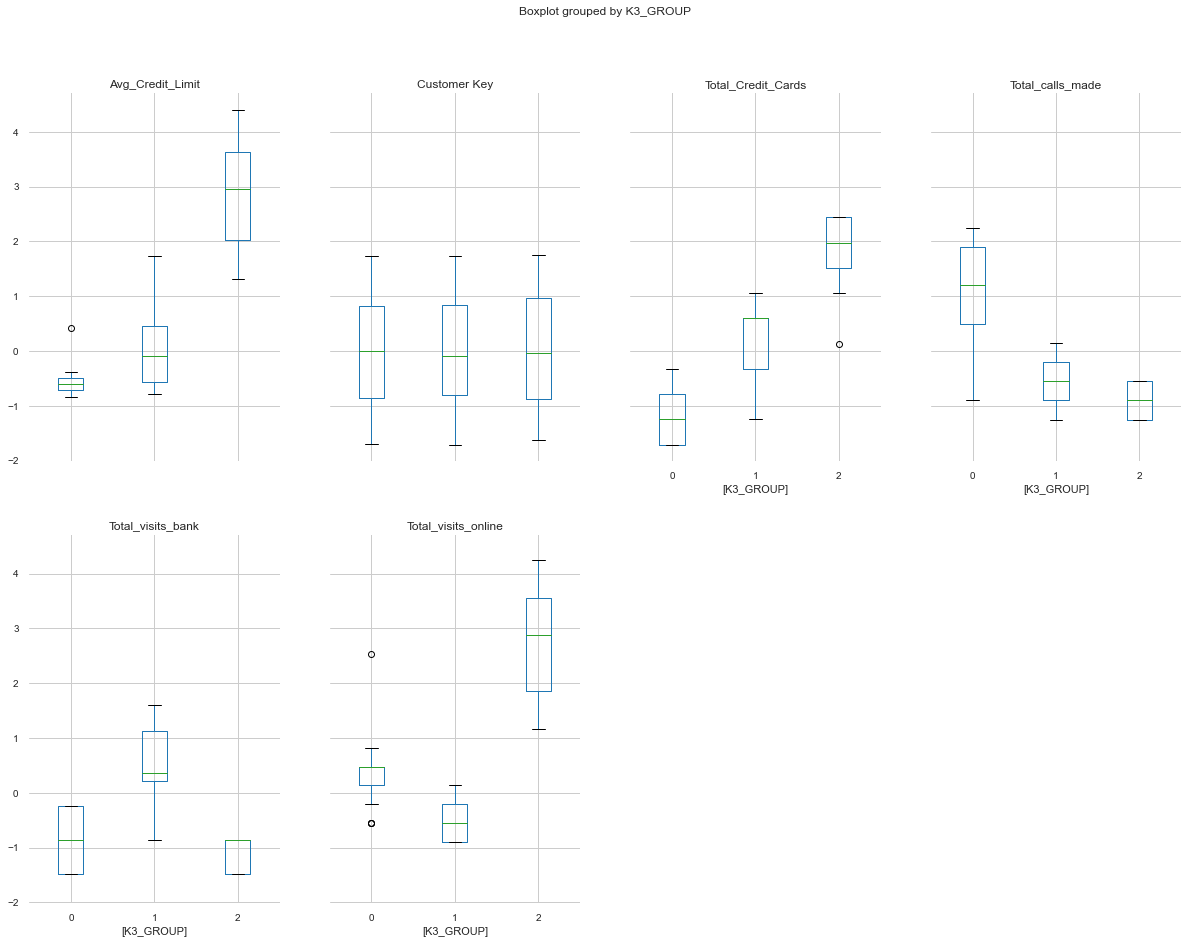

In [27]:
df_z.boxplot(by = 'K3_GROUP',  layout=(2,4), figsize=(20, 15))

In [29]:
#Let's try the value of 5 for K as the next elbow is at 5
kmeans5 = KMeans(n_clusters=5, n_init = 15, random_state=1)
kmeans5.fit(df_z)
k5_prediction=kmeans5.predict(df_z)


In [30]:
#Append the k-means prediction for K=5
df["K5_GROUP"] = k5_prediction
df_z["K5_GROUP"] = k5_prediction
df_z.head(10)

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0       1.251195          1.739436           -1.249084          -0.864813   
1      -0.650482          0.410337           -0.788414          -1.480522   
2      -1.474051          0.410337            1.054266          -0.864813   
3      -0.569114         -0.121303            0.132926          -0.864813   
5       0.139750         -0.387123           -0.788414          -1.480522   
6      -0.261385          1.739436            0.132926          -1.480522   
7      -0.691049         -0.520033           -0.788414          -1.480522   
8       1.072084         -0.785853           -1.249084          -1.480522   
9      -0.402079         -0.839017           -0.327744          -1.480522   
10     -0.090559         -0.652943           -0.327744          -1.480522   

    Total_visits_online  Total_calls_made  K3_GROUP  K5_GROUP  
0             -0.548851         -1.252966         1         1  
1              2.535493          1.900849         0         0  
2              0.136559          0.148730         1         2  
3             -0.548851          0.148730         1         2  
5             -0.548851          1.550425         0         4  
6              2.878198         -0.552118         2         3  
7             -0.548851         -0.902542         0         0  
8             -0.206146         -0.552118         0         4  
9             -0.548851          1.200001         0         0  
10             0.821969          0.499153         0         0

In [31]:
#Analyze the distribution of the data among the three groups (K = 3)
df_groupedk5 = df_z.groupby(['K5_GROUP'])
df_groupedk5.mean()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
K5_GROUP                                                       
0            -0.875700         -0.590024           -0.949015   
1             0.936971          0.085912            0.410406   
2            -0.771624         -0.105079            0.344878   
3             0.071903          2.852625            1.881592   
4             0.850106         -0.599779           -1.171626   

          Total_visits_bank  Total_visits_online  Total_calls_made  K3_GROUP  
K5_GROUP                                                                      
0                 -0.910003             0.372365          1.126059         0  
1                  0.683462            -0.566888         -0.570562         1  
2                  0.646999            -0.542415         -0.534021         1  
3                 -1.103557             2.836235         -0.888239         2  
4                 -0.897505             0.291231          1.168990         0

In [32]:
#Perform Value counts for K=5
df_groupedk5['K5_GROUP'].value_counts()  

K5_GROUP  K5_GROUP
0         0           109
1         1           171
2         2           213
3         3            49
4         4           113
Name: K5_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F764091D08>,
      dtype=object)

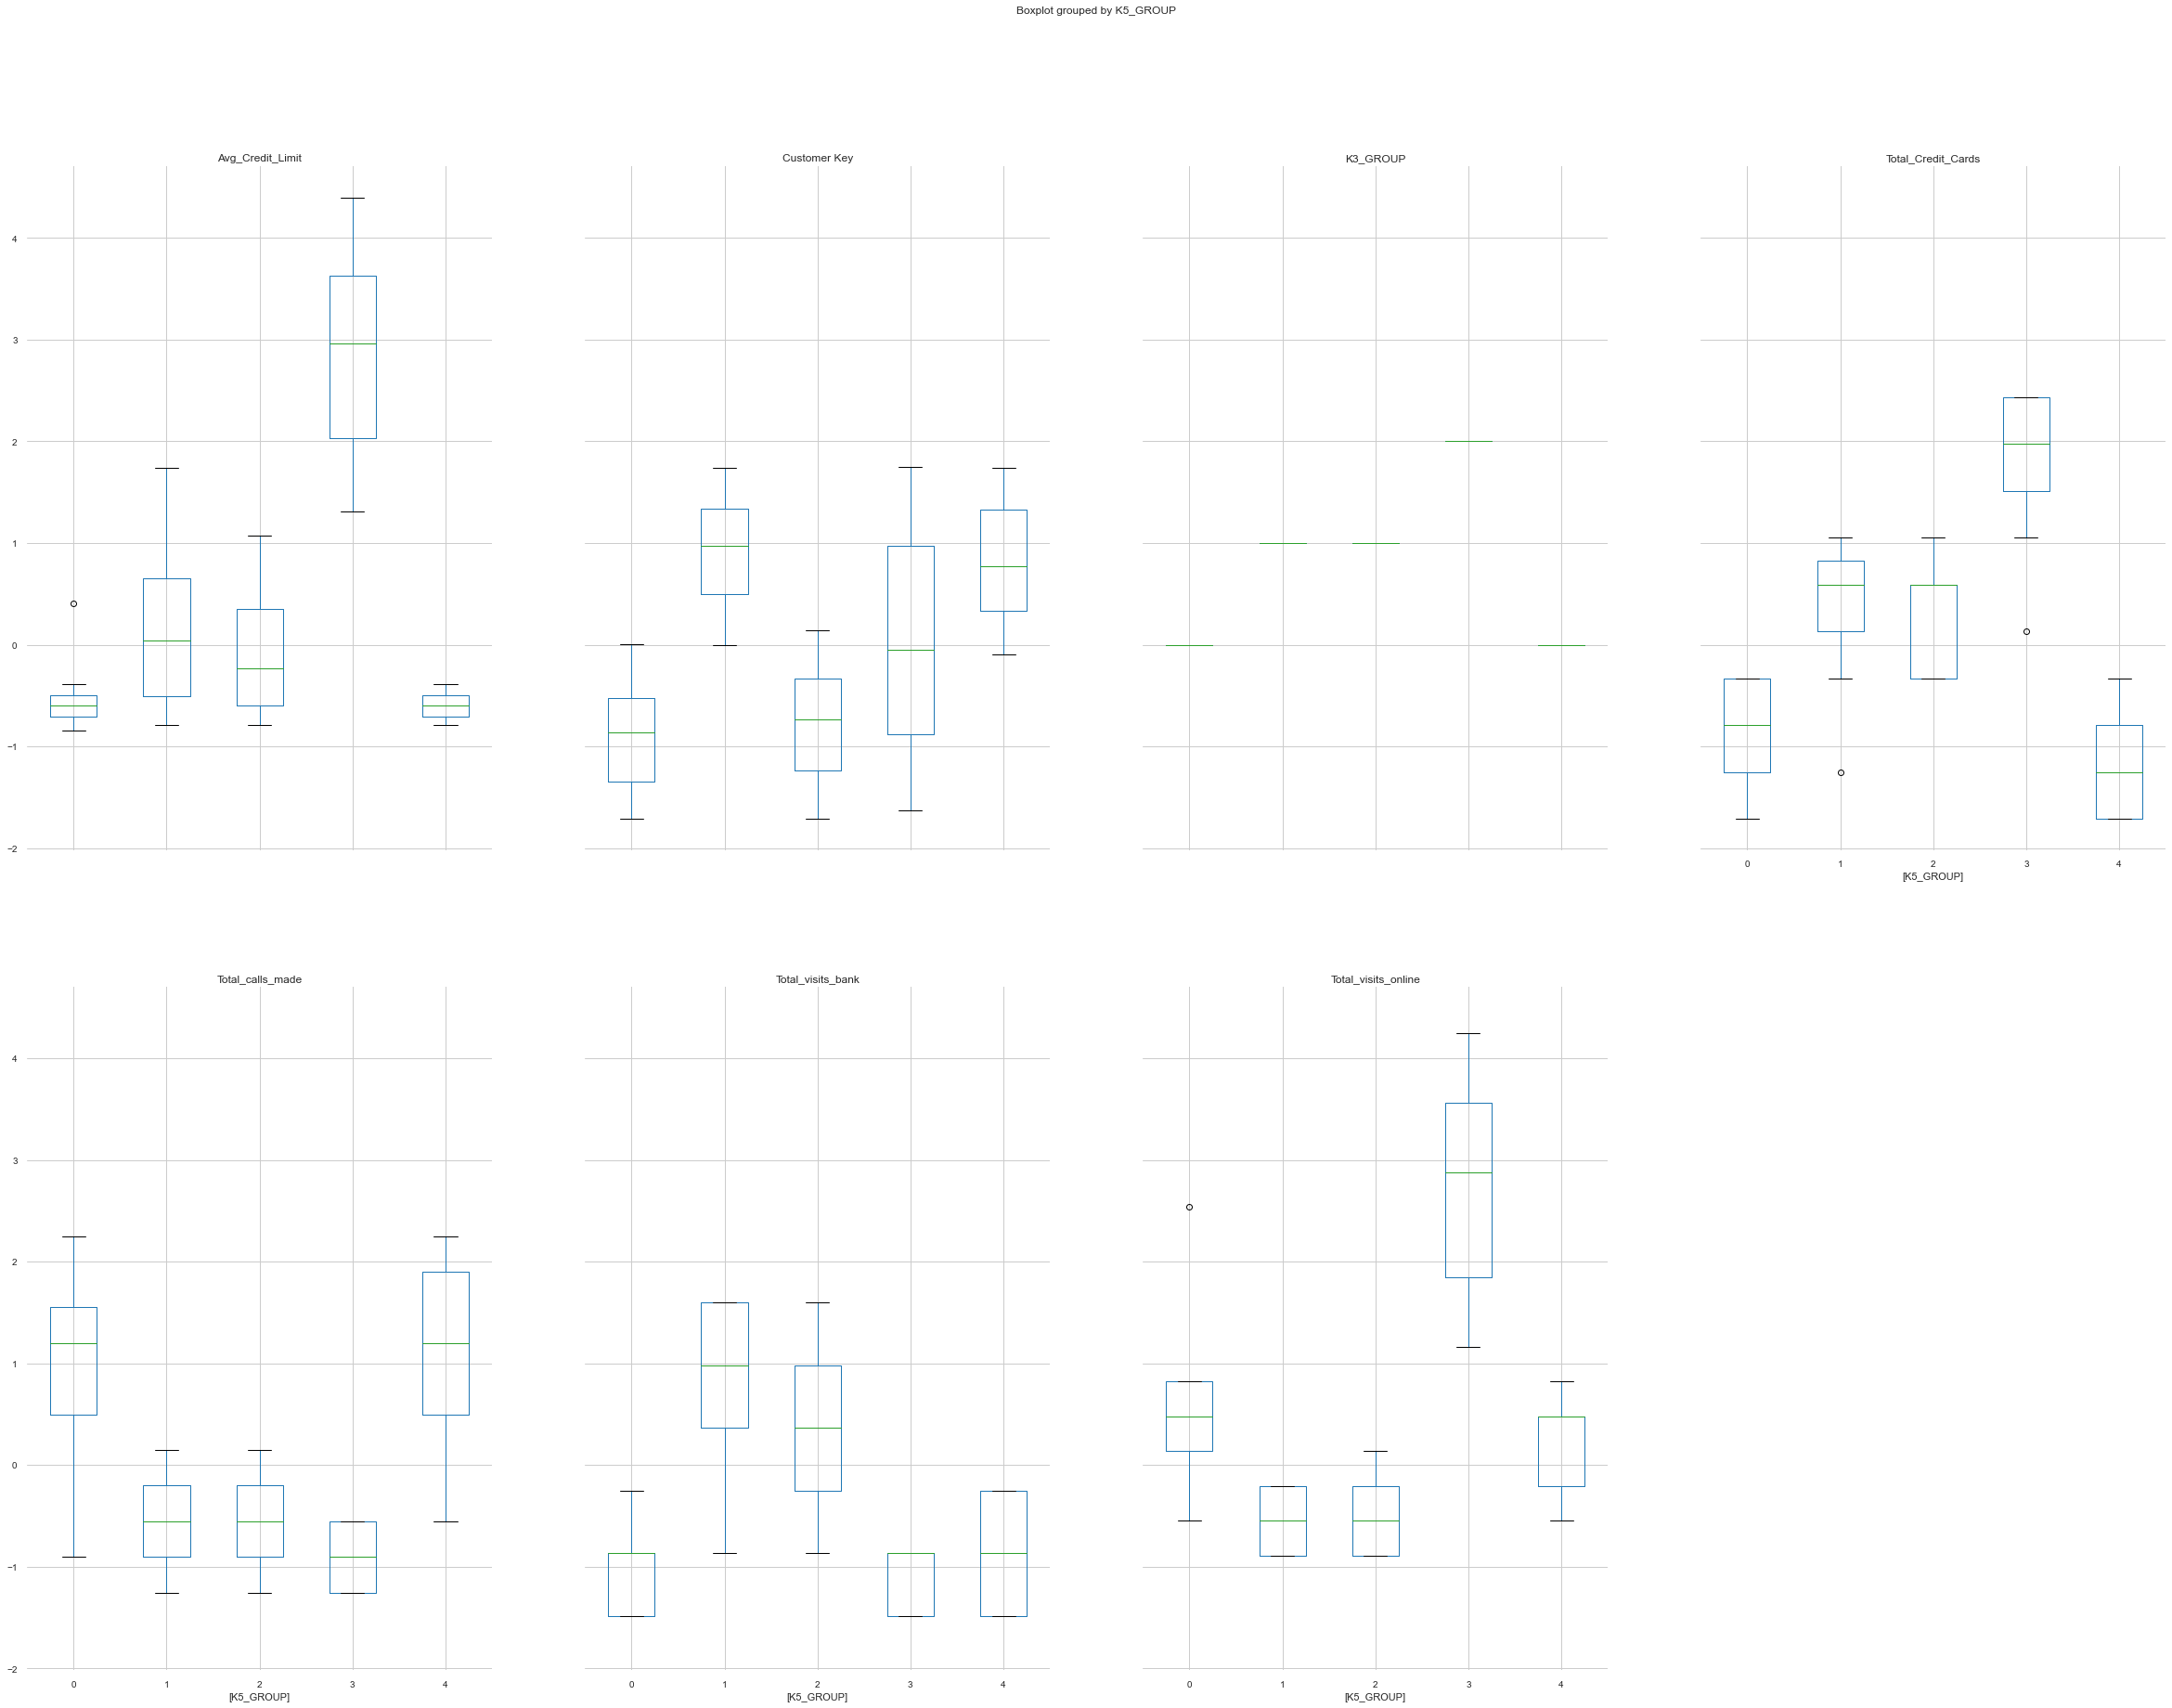

In [33]:
#Box plots for K=5
df_z.boxplot(by = 'K5_GROUP',  layout=(2,4), figsize=(40, 30))

In [ ]:
#4

In [34]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z_ea = linkage(df_z, metric='euclidean', method='average')
c_ea, coph_dists_ea = cophenet(Z_ea , pdist(df_z))

print("cophenet index for Average method with Euclidean distance :",c_ea)


cophenet index for Average method with Euclidean distance : 0.9185047026907476


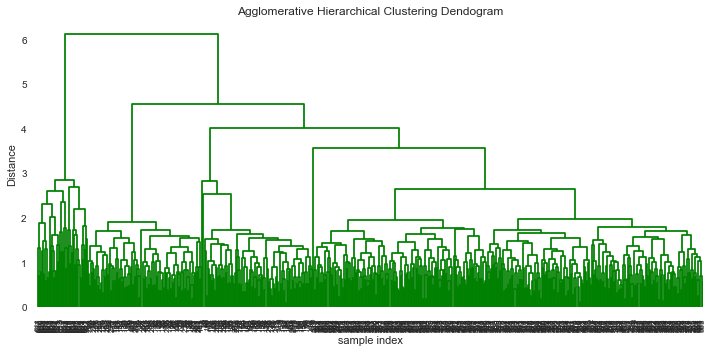

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ea, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [36]:

Z_ec = linkage(df_z, metric='euclidean', method='complete')
c_ec, coph_dists_ec = cophenet(Z_ec , pdist(df_z))

print("cophenet index for Complete method with Euclidean distance :",c_ec)

cophenet index for Complete method with Euclidean distance : 0.8818722716028494


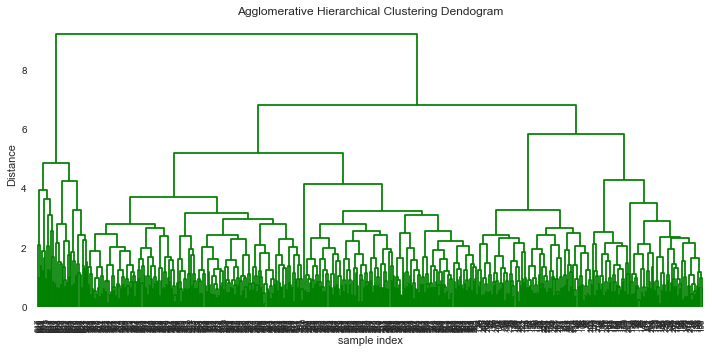

In [37]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ec, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [38]:

Z_ew = linkage(df_z, metric='euclidean', method='ward')
c_ew, coph_dists_ew = cophenet(Z_ew , pdist(df_z))

print("cophenet index for Ward method with Euclidean distance :",c_ew)

cophenet index for Ward method with Euclidean distance : 0.8460513567894656


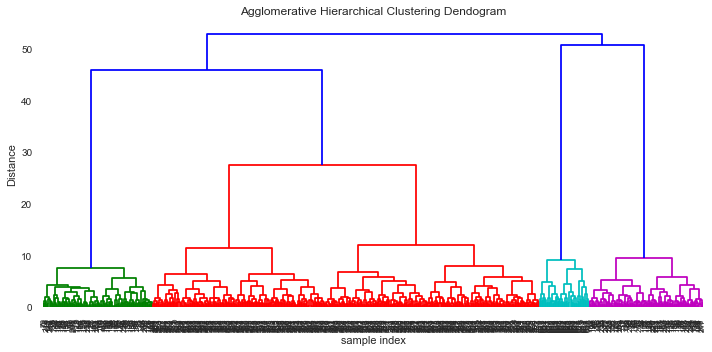

In [39]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ew, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [ ]:
# Cophenet index for Euclidean distance is maximum for Average method : 0.9185047026907476

In [40]:
model_a3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_a3.fit(df_z)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [41]:
#Append the Agglo prediction for 3 clusters
df["A3_GROUP"] = model_a3.labels_
df_z["A3_GROUP"] = model_a3.labels_
df_z.head(10)

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0       1.251195          1.739436           -1.249084          -0.864813   
1      -0.650482          0.410337           -0.788414          -1.480522   
2      -1.474051          0.410337            1.054266          -0.864813   
3      -0.569114         -0.121303            0.132926          -0.864813   
5       0.139750         -0.387123           -0.788414          -1.480522   
6      -0.261385          1.739436            0.132926          -1.480522   
7      -0.691049         -0.520033           -0.788414          -1.480522   
8       1.072084         -0.785853           -1.249084          -1.480522   
9      -0.402079         -0.839017           -0.327744          -1.480522   
10     -0.090559         -0.652943           -0.327744          -1.480522   

    Total_visits_online  Total_calls_made  K3_GROUP  K5_GROUP  A3_GROUP  
0             -0.548851         -1.252966         1         1         0  
1              2.535493          1.900849         0         0         0  
2              0.136559          0.148730         1         2         0  
3             -0.548851          0.148730         1         2         0  
5             -0.548851          1.550425         0         4         2  
6              2.878198         -0.552118         2         3         1  
7             -0.548851         -0.902542         0         0         0  
8             -0.206146         -0.552118         0         4         2  
9             -0.548851          1.200001         0         0         0  
10             0.821969          0.499153         0         0         0

In [42]:
#Analyze the distribution of the data among the three CLUSTERS
df_groupeda3 = df_z.groupby(['A3_GROUP'])
df_groupeda3.mean()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
A3_GROUP                                                       
0            -0.201998         -0.146052            0.081533   
1             0.071903          2.852625            1.881592   
2             0.850106         -0.599779           -1.171626   

          Total_visits_bank  Total_visits_online  Total_calls_made  K3_GROUP  \
A3_GROUP                                                                       
0                  0.315400            -0.348650         -0.179660  0.778905   
1                 -1.103557             2.836235         -0.888239  2.000000   
2                 -0.897505             0.291231          1.168990  0.000000   

          K5_GROUP  
A3_GROUP            
0         1.210953  
1         3.000000  
2         4.000000

In [43]:
df_z['A3_GROUP'].value_counts()  

0    493
2    113
1     49
Name: A3_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F7619E1A48>,
      dtype=object)

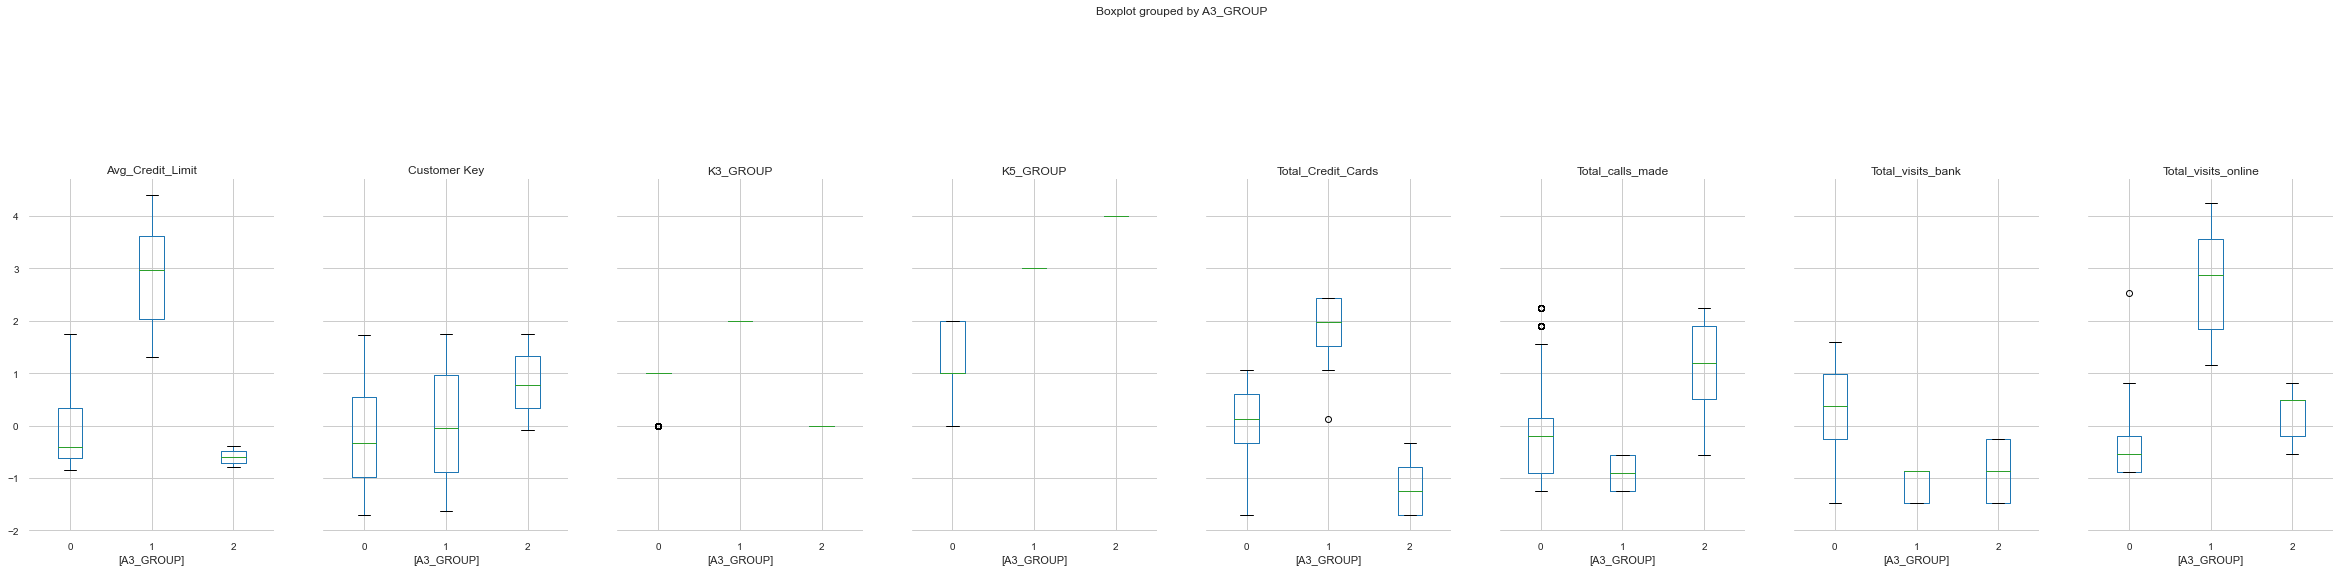

In [44]:
#Box plots for 3 clusters
df_z.boxplot(by = 'A3_GROUP',  layout=(4,8), figsize=(40, 30))

In [ ]:
#5

In [ ]:
#Silhouette Score for Hierarchical clustering

In [45]:
list_clusters = [2, 3, 4, 5, 6]
Total_score_loop = 0
 
for i in list_clusters:
    model_loop = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='average')
    model_loop.fit(df_z)
    score_loop = silhouette_score(df_z, model_loop.fit_predict(df_z))
    
    Total_score_loop = Total_score_loop + score_loop
    
    
    print('Silhouette Score for Agglo with', i ,'clusters: %.2f' % score_loop)


Silhouette Score for Agglo with 2 clusters: 0.46
Silhouette Score for Agglo with 3 clusters: 0.49
Silhouette Score for Agglo with 4 clusters: 0.52
Silhouette Score for Agglo with 5 clusters: 0.45
Silhouette Score for Agglo with 6 clusters: 0.43


In [47]:
print('Total Silhouette Score for AgglomerativeClustering : %.2f' % Total_score_loop)

Total Silhouette Score for AgglomerativeClustering : 2.34


In [48]:
Avg_score = Total_score_loop/5
print('Average Silhouette Score for AgglomerativeClustering : %.2f' % Avg_score)


Average Silhouette Score for AgglomerativeClustering : 0.47


In [ ]:
#Silhouette Score for K-means clustering

In [49]:
list_clusters = [2, 3, 4, 5, 6]
Total_score_kloop = 0
 
for i in list_clusters:
    kmeans_loop = KMeans(n_clusters=i, n_init = 15, random_state=1)
    kmeans_loop.fit(df_z)
    kmeans_loop_prediction=kmeans_loop.predict(df_z)
    score_kloop = silhouette_score(df_z, kmeans_loop.labels_, metric='euclidean')
    
    Total_score_kloop = Total_score_kloop + score_kloop


    print('Silhouette Score for k-Means with', i ,'clusters: %.2f' % score_kloop)


Silhouette Score for k-Means with 2 clusters: 0.43
Silhouette Score for k-Means with 3 clusters: 0.49
Silhouette Score for k-Means with 4 clusters: 0.52
Silhouette Score for k-Means with 5 clusters: 0.44
Silhouette Score for k-Means with 6 clusters: 0.39


In [50]:
print('Total Silhouette Score for k-Means Clustering : %.2f' % Total_score_kloop)

Total Silhouette Score for k-Means Clustering : 2.26


In [51]:
Avg_kscore = Total_score_kloop/5
print('Average Silhouette Score for k-Means Clustering : %.2f' % Avg_kscore)


Average Silhouette Score for k-Means Clustering : 0.45


In [ ]:
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.


In [ ]:
#Based on Silhouette score 4 clusters are good for both K-Means and Hierarchical.

In [52]:
#Using K=4 as it has the highest Silhouette score
kmeans4 = KMeans(n_clusters=4, n_init = 14, random_state=1)
kmeans4.fit(df_z)
k4_prediction=kmeans4.predict(df_z)

In [53]:
#Append the k-means prediction for K=4
df["K4_GROUP"] = k4_prediction
df_z["K4_GROUP"] = k4_prediction
df_z.head(10)

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0       1.251195          1.739436           -1.249084          -0.864813   
1      -0.650482          0.410337           -0.788414          -1.480522   
2      -1.474051          0.410337            1.054266          -0.864813   
3      -0.569114         -0.121303            0.132926          -0.864813   
5       0.139750         -0.387123           -0.788414          -1.480522   
6      -0.261385          1.739436            0.132926          -1.480522   
7      -0.691049         -0.520033           -0.788414          -1.480522   
8       1.072084         -0.785853           -1.249084          -1.480522   
9      -0.402079         -0.839017           -0.327744          -1.480522   
10     -0.090559         -0.652943           -0.327744          -1.480522   

    Total_visits_online  Total_calls_made  K3_GROUP  K5_GROUP  A3_GROUP  \
0             -0.548851         -1.252966         1         1         0   
1              2.535493          1.900849         0         0         0   
2              0.136559          0.148730         1         2         0   
3             -0.548851          0.148730         1         2         0   
5             -0.548851          1.550425         0         4         2   
6              2.878198         -0.552118         2         3         1   
7             -0.548851         -0.902542         0         0         0   
8             -0.206146         -0.552118         0         4         2   
9             -0.548851          1.200001         0         0         0   
10             0.821969          0.499153         0         0         0   

    K4_GROUP  
0          2  
1          0  
2          2  
3          2  
5          1  
6          3  
7          0  
8          1  
9          0  
10         0

In [54]:
k_centroids = kmeans4.cluster_centers_

In [55]:
k_centroids

array([[-8.75700248e-01, -5.90024197e-01, -9.49014622e-01,
        -9.10002586e-01,  3.72364933e-01,  1.12605871e+00,
        -3.33066907e-16, -6.66133815e-16,  7.77156117e-16],
       [ 8.50105576e-01, -5.99779057e-01, -1.17162634e+00,
        -8.97505444e-01,  2.91230918e-01,  1.16899041e+00,
        -1.11022302e-16,  4.00000000e+00,  2.00000000e+00],
       [-1.07652805e-02, -2.00285471e-02,  3.74058194e-01,
         6.63236211e-01, -5.53313450e-01, -5.50293209e-01,
         1.00000000e+00,  1.55468750e+00,  8.88178420e-16],
       [ 7.19033604e-02,  2.85262516e+00,  1.88159231e+00,
        -1.10355730e+00,  2.83623456e+00, -8.88239258e-01,
         2.00000000e+00,  3.00000000e+00,  1.00000000e+00]])

In [57]:
#Analyze the distribution of the data among the four groups (K = 4)
df_groupedk4 = df_z.groupby(['K4_GROUP'])
df_groupedk4.mean()


Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
K4_GROUP                                                       
0            -0.875700         -0.590024           -0.949015   
1             0.850106         -0.599779           -1.171626   
2            -0.010765         -0.020029            0.374058   
3             0.071903          2.852625            1.881592   

          Total_visits_bank  Total_visits_online  Total_calls_made  K3_GROUP  \
K4_GROUP                                                                       
0                 -0.910003             0.372365          1.126059       0.0   
1                 -0.897505             0.291231          1.168990       0.0   
2                  0.663236            -0.553313         -0.550293       1.0   
3                 -1.103557             2.836235         -0.888239       2.0   

          K5_GROUP  A3_GROUP  
K4_GROUP                      
0         0.000000         0  
1         4.000000         2  
2         1.554688         0  
3         3.000000         1

In [58]:
#Perform Value counts for K=4
df_groupedk4['K4_GROUP'].value_counts()  

K4_GROUP  K4_GROUP
0         0           109
1         1           113
2         2           384
3         3            49
Name: K4_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F762EF3688>,
      dtype=object)

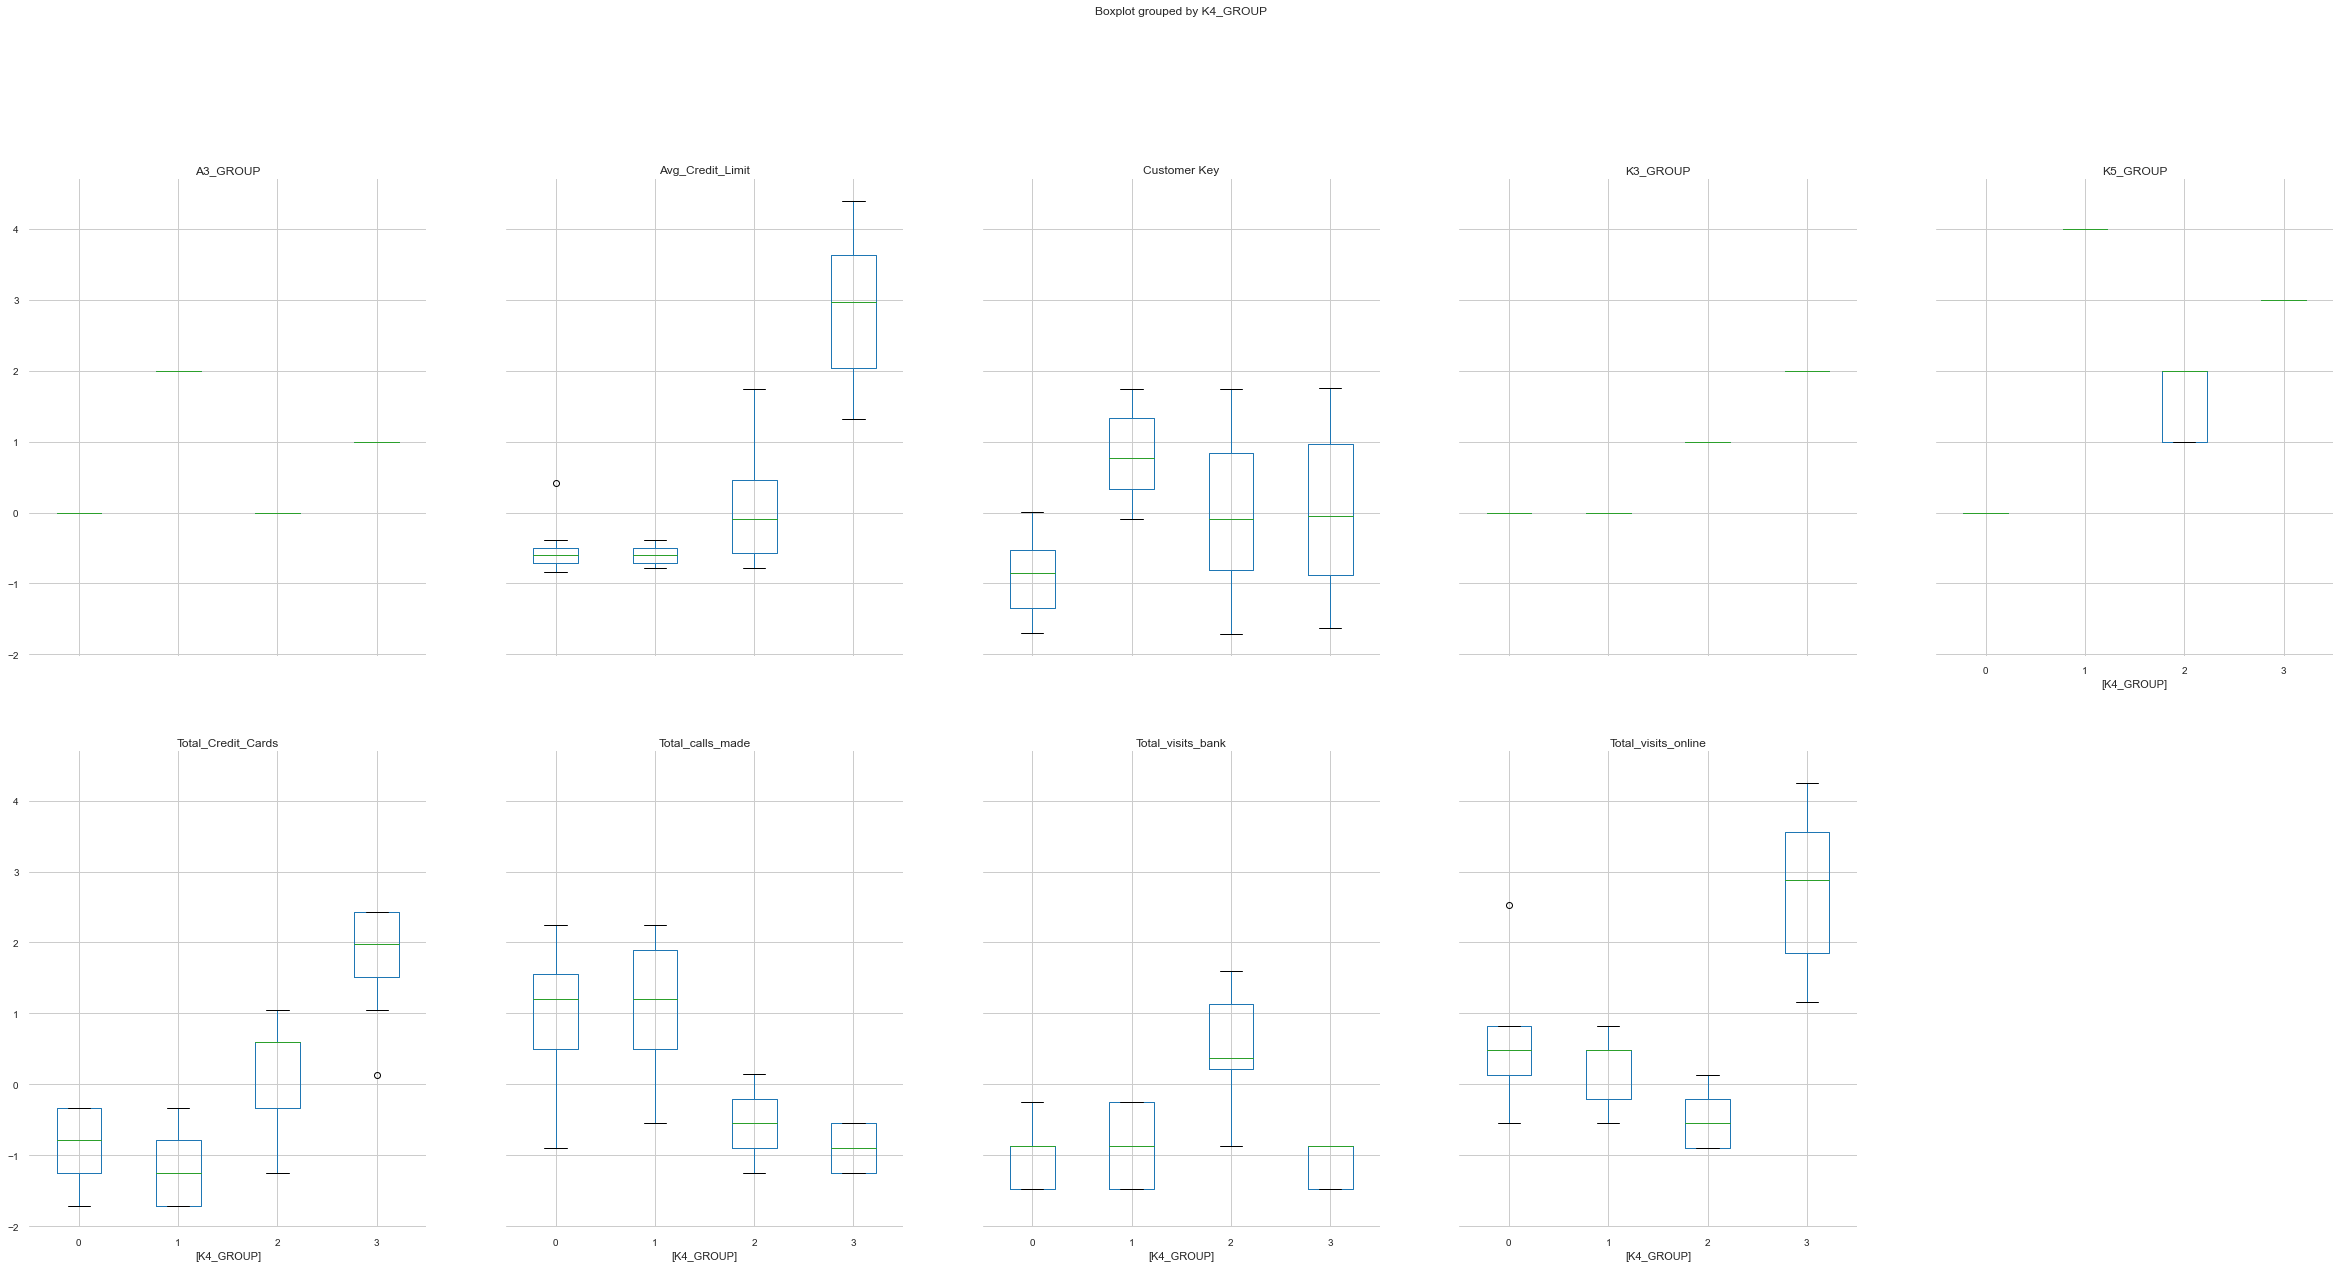

In [59]:
#Box plots for K=4
df_z.boxplot(by = 'K4_GROUP',  layout=(3,5), figsize=(40, 30))

In [60]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

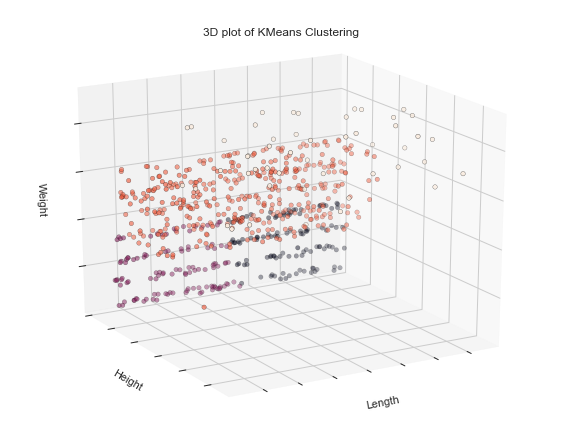

In [62]:

## 3D plots of clusters

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = kmeans4.labels_
ax.scatter(df_z.iloc[:, 0], df_z.iloc[:, 1], df_z.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [ ]:
#AgglomerativeClustering for 4 clusters

In [63]:
model_a4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')
model_a4.fit(df_z)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [64]:
#Append the Agglo prediction for 4 clusters
df["A4_GROUP"] = model_a4.labels_
df_z["A4_GROUP"] = model_a4.labels_
df_z.head(10)

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0       1.251195          1.739436           -1.249084          -0.864813   
1      -0.650482          0.410337           -0.788414          -1.480522   
2      -1.474051          0.410337            1.054266          -0.864813   
3      -0.569114         -0.121303            0.132926          -0.864813   
5       0.139750         -0.387123           -0.788414          -1.480522   
6      -0.261385          1.739436            0.132926          -1.480522   
7      -0.691049         -0.520033           -0.788414          -1.480522   
8       1.072084         -0.785853           -1.249084          -1.480522   
9      -0.402079         -0.839017           -0.327744          -1.480522   
10     -0.090559         -0.652943           -0.327744          -1.480522   

    Total_visits_online  Total_calls_made  K3_GROUP  K5_GROUP  A3_GROUP  \
0             -0.548851         -1.252966         1         1         0   
1              2.535493          1.900849         0         0         0   
2              0.136559          0.148730         1         2         0   
3             -0.548851          0.148730         1         2         0   
5             -0.548851          1.550425         0         4         2   
6              2.878198         -0.552118         2         3         1   
7             -0.548851         -0.902542         0         0         0   
8             -0.206146         -0.552118         0         4         2   
9             -0.548851          1.200001         0         0         0   
10             0.821969          0.499153         0         0         0   

    K4_GROUP  A4_GROUP  
0          2         0  
1          0         3  
2          2         0  
3          2         0  
5          1         2  
6          3         1  
7          0         3  
8          1         2  
9          0         3  
10         0         3

In [65]:
#Analyze the distribution of the data among the four CLUSTERS
df_groupeda4 = df_z.groupby(['A4_GROUP'])
df_groupeda4.mean()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
A4_GROUP                                                       
0            -0.010765         -0.020029            0.374058   
1             0.071903          2.852625            1.881592   
2             0.850106         -0.599779           -1.171626   
3            -0.875700         -0.590024           -0.949015   

          Total_visits_bank  Total_visits_online  Total_calls_made  K3_GROUP  \
A4_GROUP                                                                       
0                  0.663236            -0.553313         -0.550293       1.0   
1                 -1.103557             2.836235         -0.888239       2.0   
2                 -0.897505             0.291231          1.168990       0.0   
3                 -0.910003             0.372365          1.126059       0.0   

          K5_GROUP  A3_GROUP  K4_GROUP  
A4_GROUP                                
0         1.554688         0       2.0  
1         3.000000         1       3.0  
2         4.000000         2       1.0  
3         0.000000         0       0.0

In [66]:
df_z['A4_GROUP'].value_counts()  

0    384
2    113
3    109
1     49
Name: A4_GROUP, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F765A37308>,
      dtype=object)

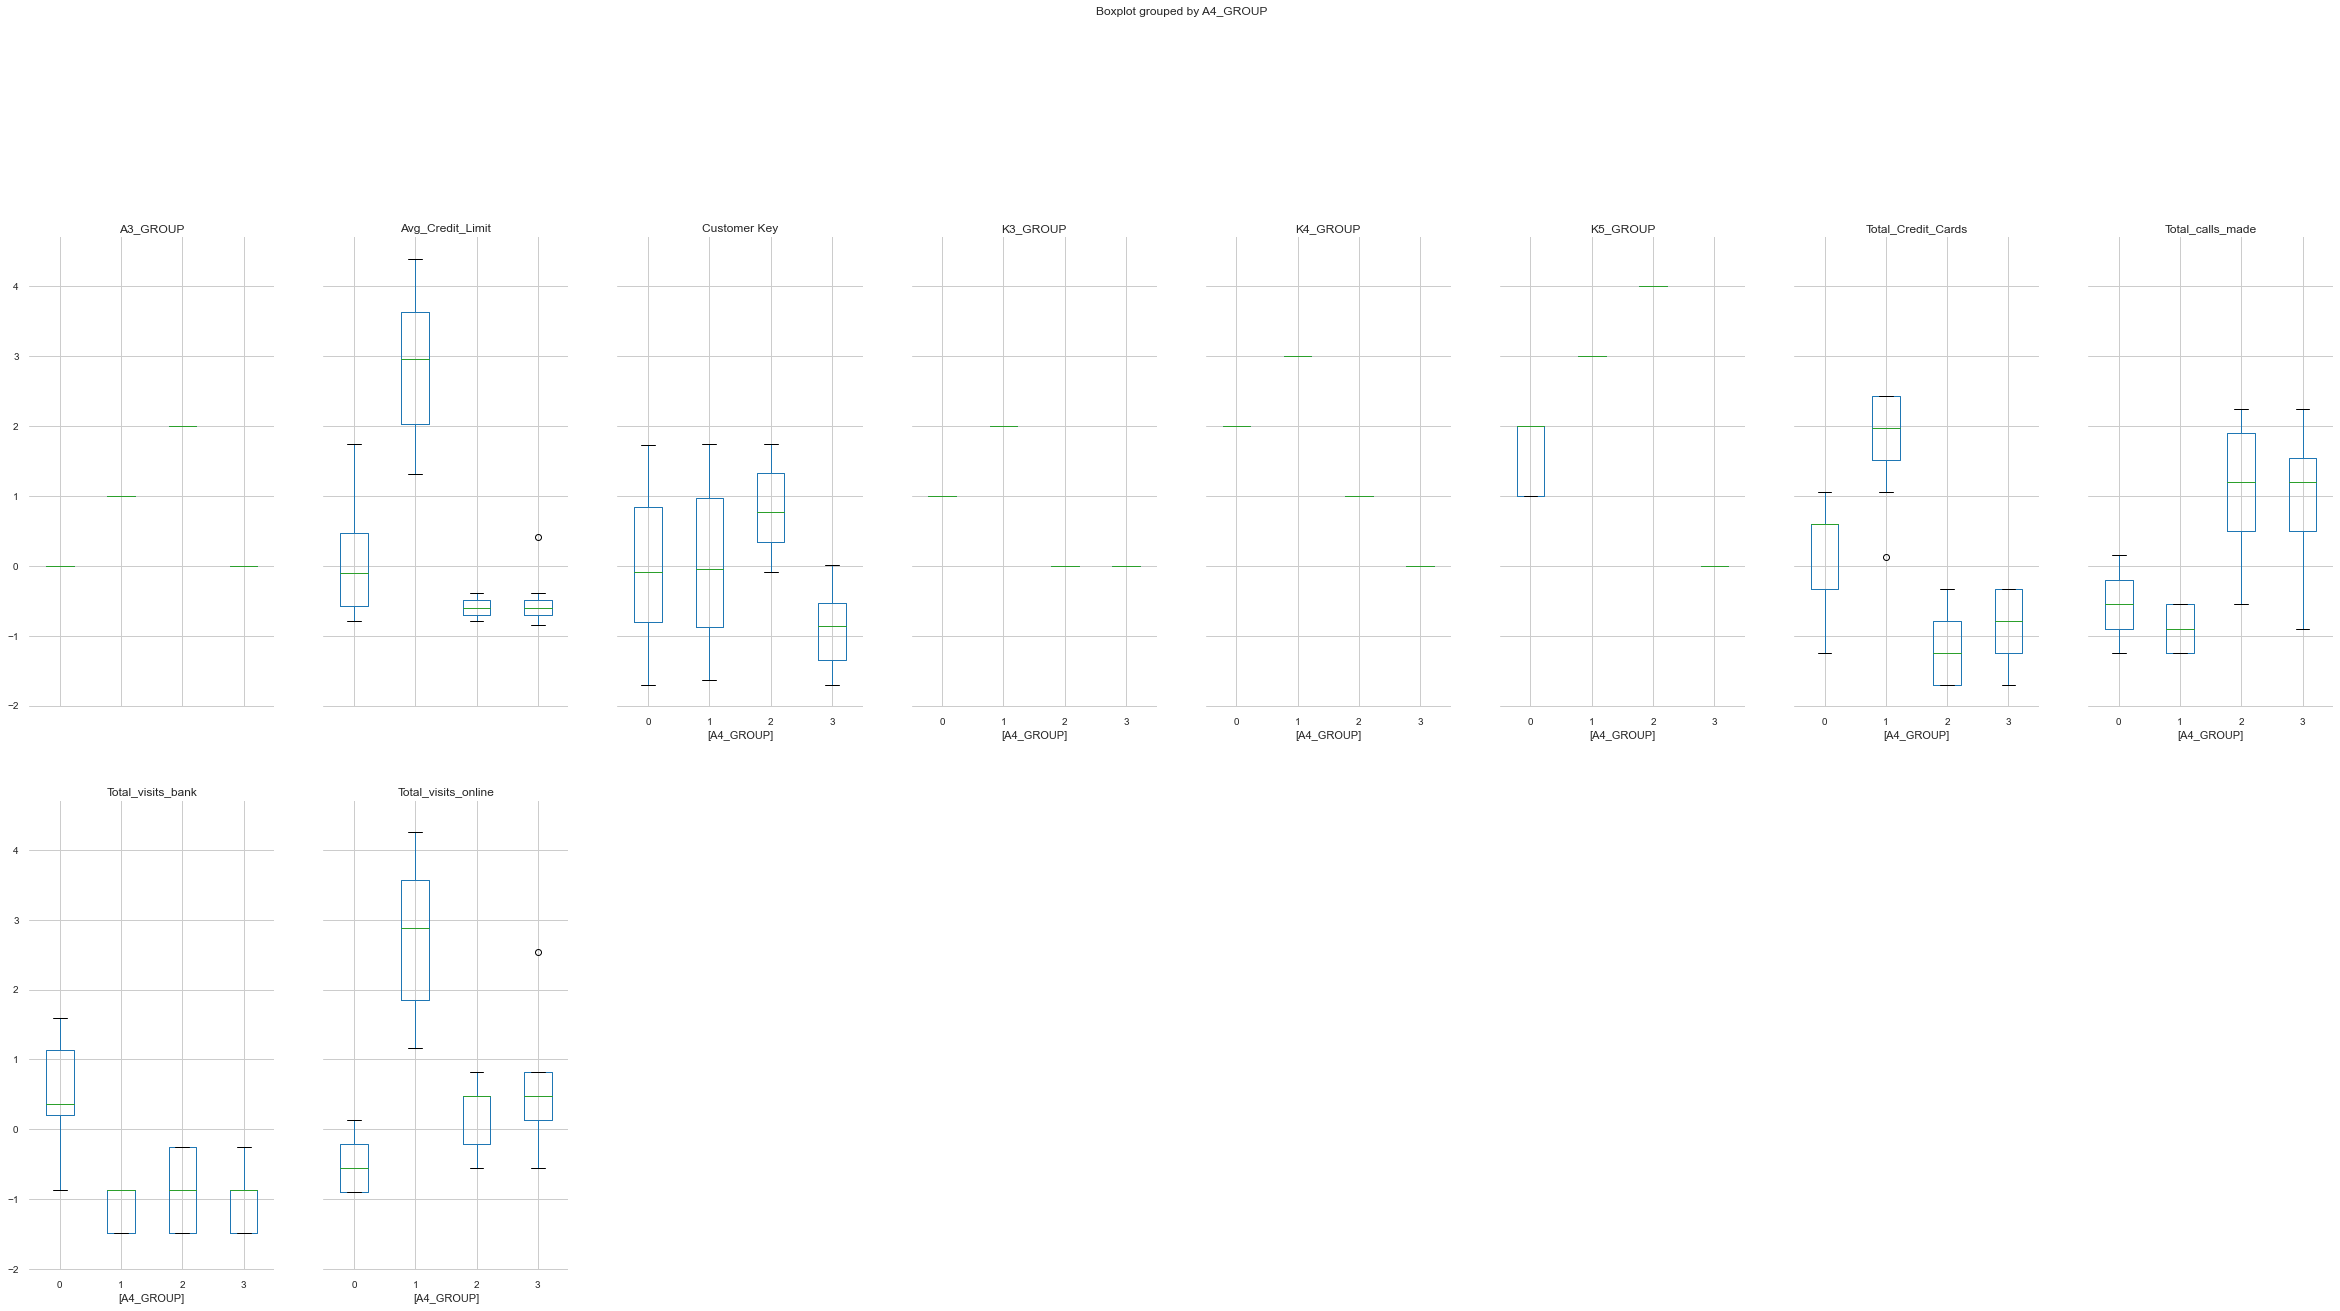

In [67]:
#Box plots for 4 clusters
df_z.boxplot(by = 'A4_GROUP',  layout=(4,8), figsize=(40, 40))

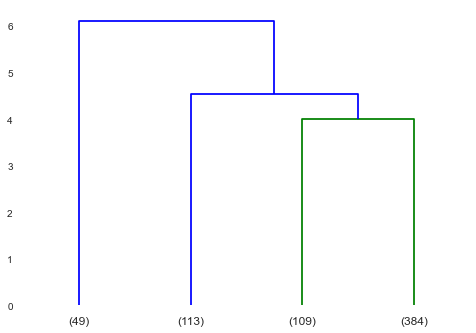

In [71]:
dendrogram(
    Z_ea,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [ ]:
#6

In [ ]:
#Compare 4 cluster for K-Means and AgglomerativeClustering

In [68]:
df_z['A4_GROUP'].value_counts()  


0    384
2    113
3    109
1     49
Name: A4_GROUP, dtype: int64

In [69]:
df_z['K4_GROUP'].value_counts()  


2    384
1    113
0    109
3     49
Name: K4_GROUP, dtype: int64

In [ ]:
##Based of the value counts,
#Cluster 0 in AgglomerativeClustering is same as Cluster 2 in K-Means clustering
#Cluster 2 in AgglomerativeClustering is same as Cluster 1 in K-Means clustering
#Cluster 3 in AgglomerativeClustering is same as Cluster 0 in K-Means clustering
#Cluster 1 in AgglomerativeClustering is same as Cluster 3 in K-Means clustering

#Mean below also confirms that

In [70]:
df_groupeda4.mean()

Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
A4_GROUP                                                       
0            -0.010765         -0.020029            0.374058   
1             0.071903          2.852625            1.881592   
2             0.850106         -0.599779           -1.171626   
3            -0.875700         -0.590024           -0.949015   

          Total_visits_bank  Total_visits_online  Total_calls_made  K3_GROUP  \
A4_GROUP                                                                       
0                  0.663236            -0.553313         -0.550293       1.0   
1                 -1.103557             2.836235         -0.888239       2.0   
2                 -0.897505             0.291231          1.168990       0.0   
3                 -0.910003             0.372365          1.126059       0.0   

          K5_GROUP  A3_GROUP  K4_GROUP  
A4_GROUP                                
0         1.554688         0       2.0  
1         3.000000         1       3.0  
2         4.000000         2       1.0  
3         0.000000         0       0.0

In [ ]:
#7

In [ ]:
##Group 0 is customers with medium Avg_Credit_Limit, medium Total_Credit_Cards, 
#highest Total_visits_bank, low Total_visits_online and low Total_calls_made

In [ ]:
##Group 1 is customers with highest Avg_Credit_Limit, highest Total_Credit_Cards, 
#least Total_visits_bank, highest Total_visits_online and least Total_calls_made

In [ ]:
##Group 2 is customers with least Avg_Credit_Limit, least Total_Credit_Cards, 
#low Total_visits_bank, medium Total_visits_online and highest Total_calls_made

In [ ]:
##Group 3 is customers with low Avg_Credit_Limit, low Total_Credit_Cards, 
#low Total_visits_bank, medium Total_visits_online and medium Total_calls_made

In [ ]:
#Key Questions:

In [ ]:
##How many different segments of customers are there?
#There are 4 different segments of customers

In [ ]:
##How are these segments different from each other?

#As already mentioned above

##Group 0 is customers with medium Avg_Credit_Limit, medium Total_Credit_Cards, 
#high Total_visits_bank, low Total_visits_online and low Total_calls_made

##Group 1 is customers with highest Avg_Credit_Limit, highest Total_Credit_Cards, 
#least Total_visits_bank, highest Total_visits_online and least Total_calls_made

##Group 2 is customers with least Avg_Credit_Limit, least Total_Credit_Cards, 
#low Total_visits_bank, medium Total_visits_online and highest Total_calls_made

##Group 3 is customers with low Avg_Credit_Limit, low Total_Credit_Cards, 
#low Total_visits_bank, medium Total_visits_online and medium Total_calls_made

In [ ]:
##What are your recommendations to the bank on how to better market to and service these customers?

#Number of customers are high is Group 0 i.e., customers with medium Avg_Credit_Limit, 
#medium Total_Credit_Cards, high Total_visits_bank, low Total_visits_online and low Total_calls_made
#Bank can concentrate more of these customers as they are high in number

##Customers with highest Total_Credit_Cards are using more online banking, so online marketing 
#will work best for these customers

##Customers with least Avg_Credit_Limit and least Total_Credit_Cards are making more 
#calls to the bank, so these customer can be reached by phone or phone marketing 
#will work best for these customers